## Visualizing statistical relationships

### relplot: Figure-level interface for drawing relational plots onto a FacetGrid.


In [1]:
# https://seaborn.pydata.org/tutorial/relational.html

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")


In [3]:
# relplot (): figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots.
# when both variables are numeric = scatterplot() function. 
# The scatterplot() is the default kind in relplot() 

tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


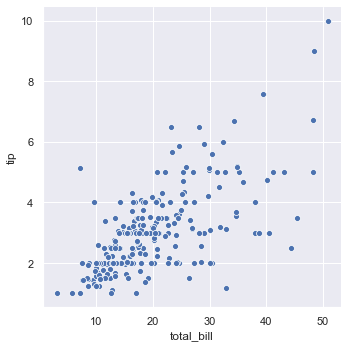

In [4]:
sns.relplot(x = 'total_bill', y = 'tip', data=tips )

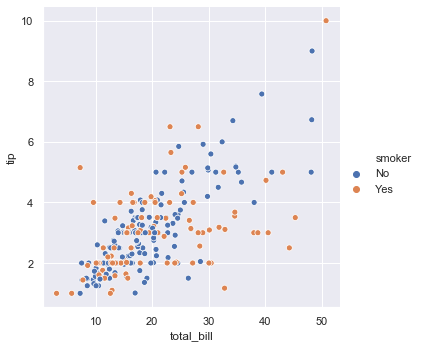

In [5]:
# added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”,


sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', data=tips )


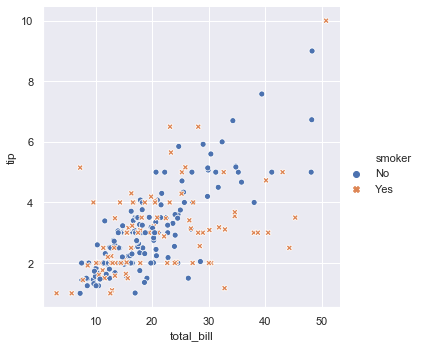

In [6]:
# use a different marker style for each class

sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', 
            style = 'smoker', data=tips )


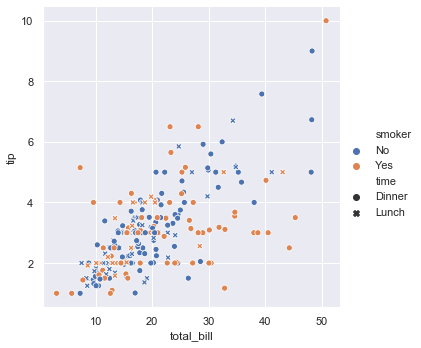

In [7]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker'
            ,style = 'time', data=tips )


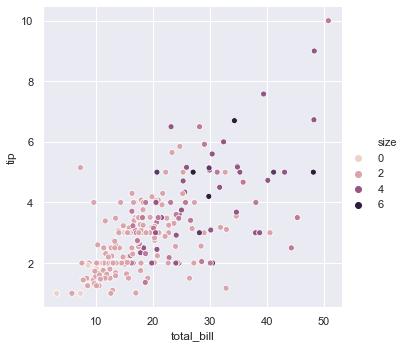

In [8]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data=tips )


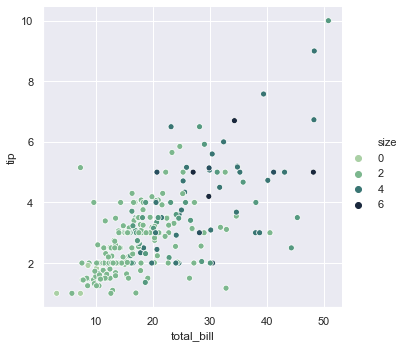

In [9]:
# customize a sequential palette using the string interface to cubehelix_palette()

sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', 
            palette="ch:r=-.5,l=.75",
            data=tips )


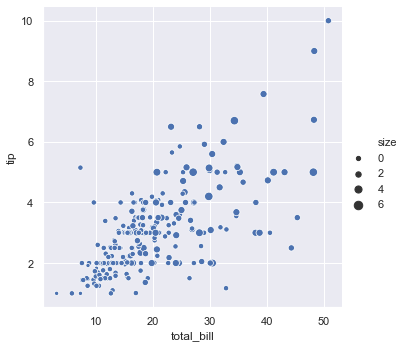

In [10]:
# change the size of each point

sns.relplot(x="total_bill", y="tip", size="size", data=tips);


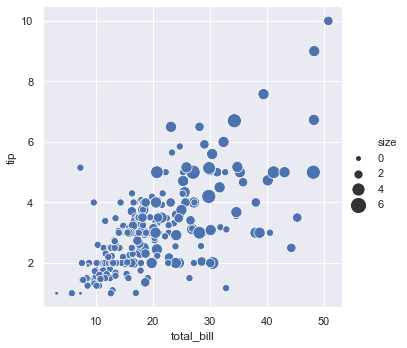

In [15]:
# the range of values in data units is normalized into a range in area units.

sns.relplot(x="total_bill", y="tip", size="size", 
            sizes=(15, 200), data=tips)


## Emphasizing continuity with line plots


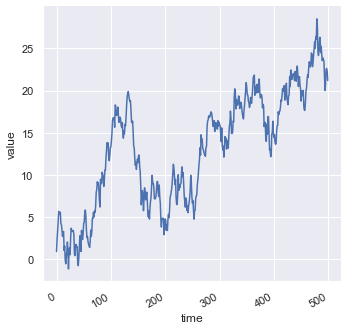

In [23]:
df = pd.DataFrame(dict(time = np.arange(500),
                 value = np.random.randn(500).cumsum()
                 ))

g = sns.relplot(x = 'time', y = 'value', kind = 'line', data=df)
g.fig.autofmt_xdate()

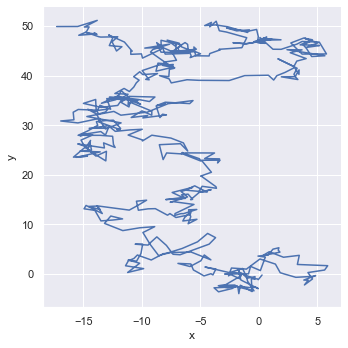

In [29]:
# Because lineplot() assumes that you are most often trying to draw y as a function of x, 
#the default behavior is to sort the data by the x values before plotting. 
#However, this can be disabled

df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=['x', 'y'])
sns.relplot(x = 'x', y = 'y', kind='line', sort=False, data=df)

## Aggregation and representing uncertainty

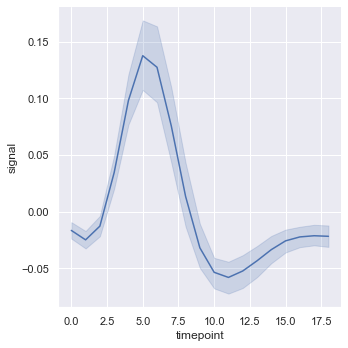

In [33]:
# The default behavior in seaborn is to aggregate the multiple measurements at each x value 
#by plotting the mean and the 95% confidence interval around the mean:

fmri = sns.load_dataset('fmri')
sns.relplot(x = 'timepoint', y = 'signal', kind='line', data=fmri)
#The confidence intervals are computed using bootstrapping, 
#which can be time-intensive for larger datasets.


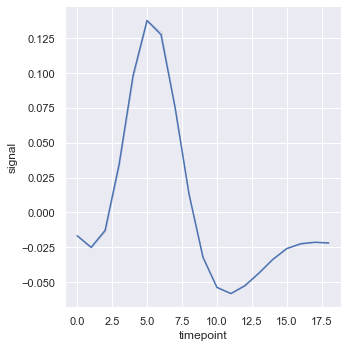

In [34]:
# disable CI
sns.relplot (x = 'timepoint', y = 'signal', kind='line', ci=False, data=fmri)

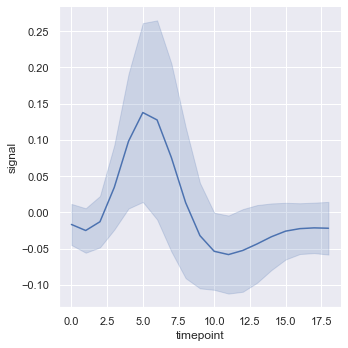

In [35]:
# to represent the spread of the distribution at each timepoint by plotting the standard deviation 
# instead of a confidence interval

sns.relplot (x = 'timepoint', y = 'signal', kind='line', ci='sd', data=fmri)

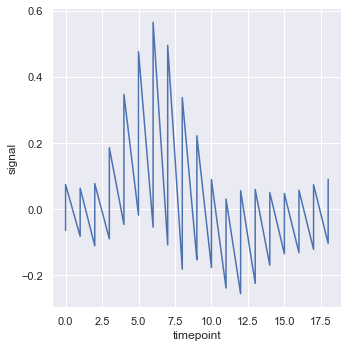

In [36]:
# To turn off aggregation altogether, set the estimator parameter to None

sns.relplot (x = 'timepoint', y = 'signal', kind='line', estimator = None,
             data=fmri)


## Plotting subsets of data with semantic mappings

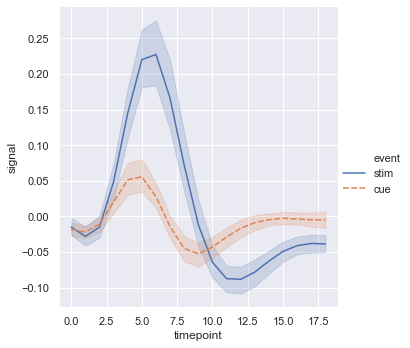

In [38]:
# Using semantics in lineplot() will also determine how the data get aggregated. 
# For example, adding a hue semantic with two levels splits the plot into two lines 
# and error bands, coloring each to indicate which subset of the data they correspond to

sns.relplot(x = "timepoint", y = "signal", hue = 'event', kind = 'line', data=fmri)


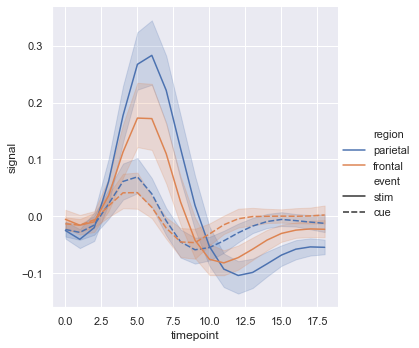

In [39]:
# Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

sns.relplot(x = "timepoint", y = "signal", hue = 'region', style ='event',kind = 'line', data=fmri)


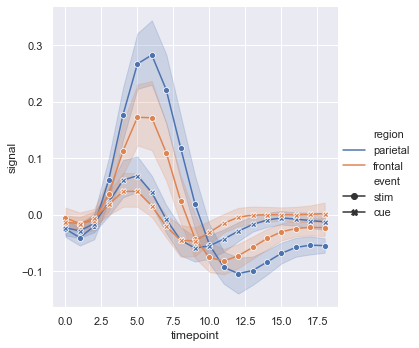

In [40]:
# you can identify subsets by the markers used at each observation, 
# either together with the dashes or instead of them:

sns.relplot(x = "timepoint", y = "signal", hue = "region", style = "event", kind = "line", 
           dashes = False, markers=True, data=fmri)


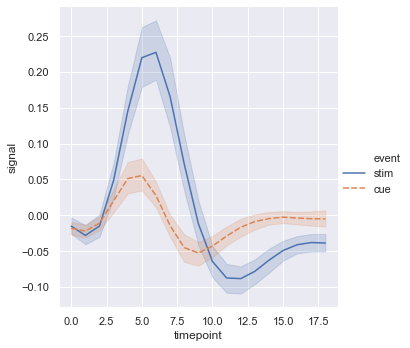

In [41]:
# even when you are only examining changes across one additional variable, 
# it can be useful to alter both the color and style of the lines. 
# This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

sns.relplot(x = "timepoint", y = "signal", hue = "event", style = "event", kind = "line", 
            data=fmri)

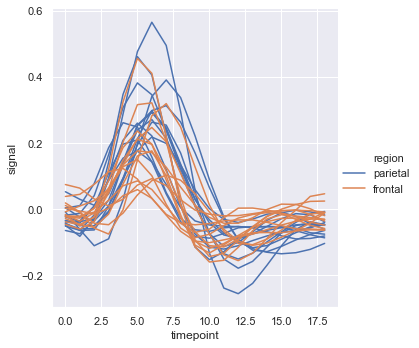

In [45]:
# When you are working with repeated measures data (that is, you have units that were sampled multiple times), 
# you can also plot each sampling unit separately without distinguishing them through semantics

sns.relplot(x = "timepoint", y = "signal", hue = "region", units = "subject", estimator = None,
            kind = "line", data=fmri.query("event=='stim'"))


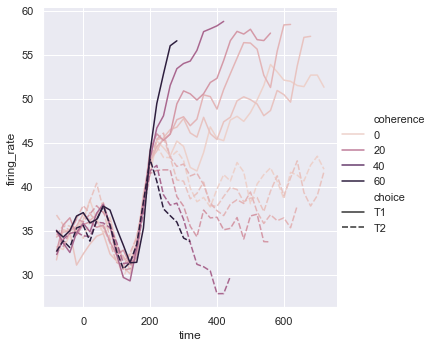

In [52]:
# The default colormap and handling of the legend in lineplot() also depends on 
# whether the hue semantic is categorical or numeric

dots = sns.load_dataset("dots").query("align=='dots'")

sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

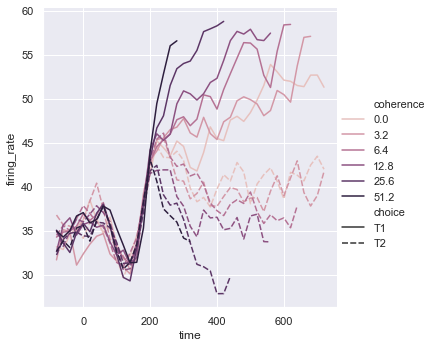

In [54]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)

sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

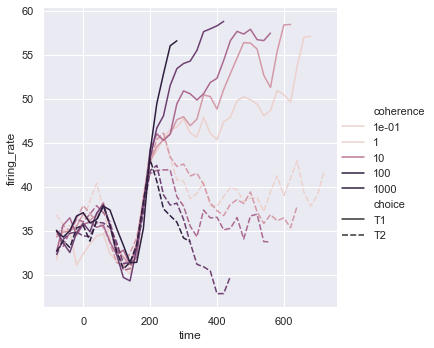

In [55]:
# To alter how the colormap is normalized:
from matplotlib.colors import LogNorm

palette = sns.cubehelix_palette(light=.7, n_colors=6)

sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

# hue_norm: normalize objects
# Normalization in data units for colormap applied to the hue variable when it is numeric. Not relevant if it is categorical.


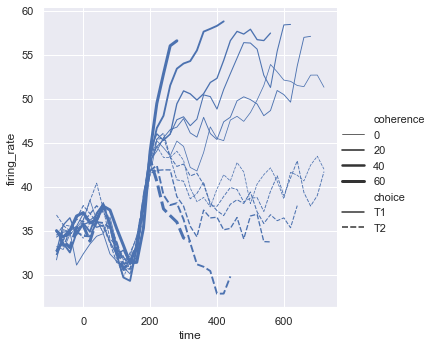

In [56]:
# The third semantic, size, changes the width of the lines

sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

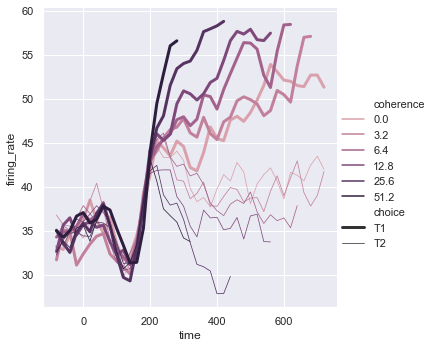

In [57]:
# so using different widths may be more effective in that case:

sns.relplot(x="time", y="firing_rate",
            hue = 'coherence',size="choice",
            palette=palette,
            kind="line", data=dots);

## Plotting with date data

### These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels.

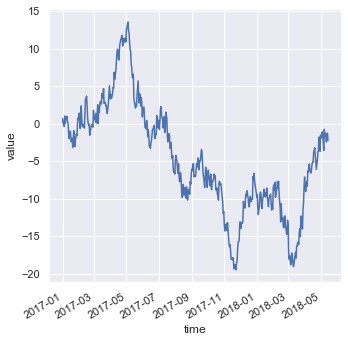

In [59]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                      value = np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [60]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Showing multiple relationships with facets

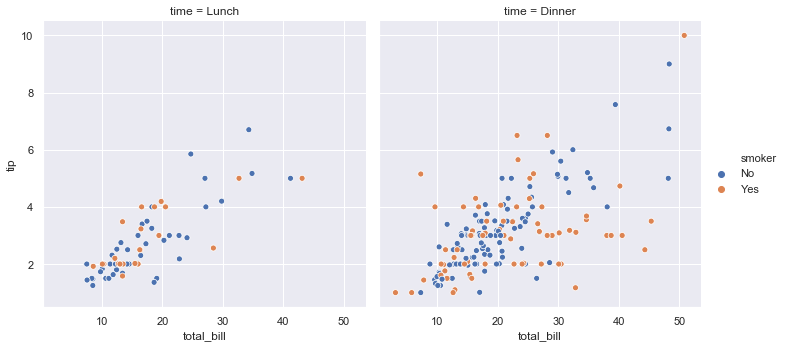

In [61]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

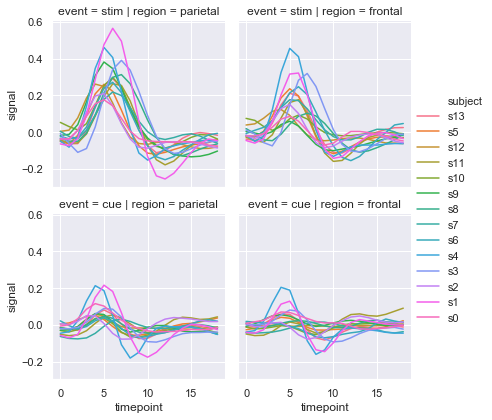

In [63]:
# As you start adding more variables to the grid, you may want to decrease the figure size

sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

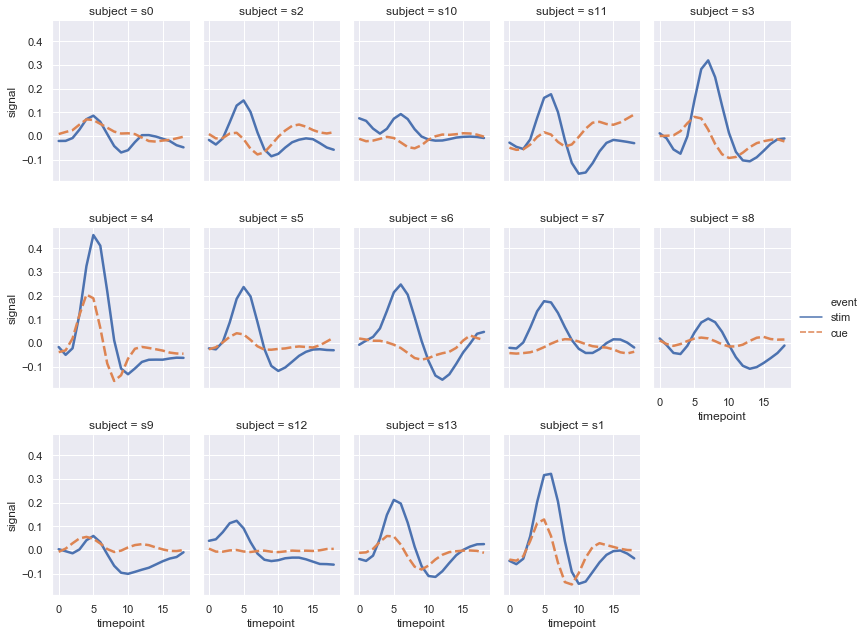

In [71]:
# When you want to examine effects across many levels of a variable

sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

In [62]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
